<a href="https://colab.research.google.com/github/hiyuchang/MATH5470-SML/blob/main/ISLR_Q8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fit some of the non-linear models investigated in this chapter to the **Auto** data set. Is there evidence for non-linear relationships in this data set? Create some informative plots to justify your answer.
Ref: https://github.com/mscaudill/IntroStatLearn/blob/master/notebooks/Ch7_Moving_Beyond_Linearity/Applied/Ch7_Applied_3.ipynb

In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('fast')

In [4]:
# import data
df = pd.read_csv('Auto.csv', na_values='?')
df = df.dropna() # drop rows with na values
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


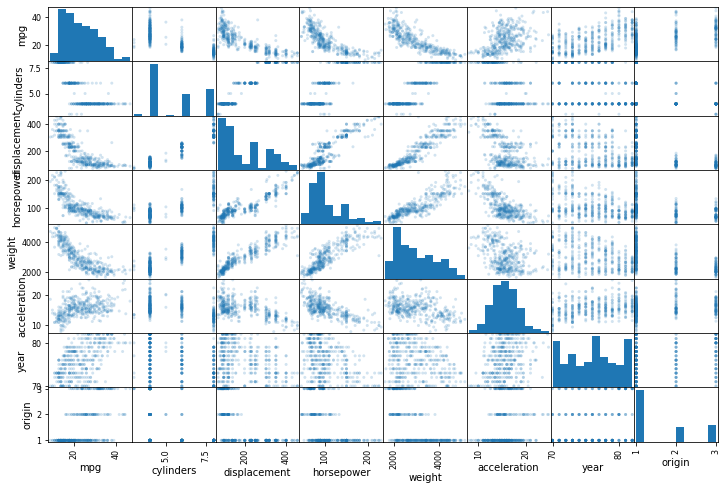

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(12,8));

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from patsy import cr, dmatrix

In [24]:
def natural_spline_cv(predictor, response, dofs=list(np.arange(2,10)), kfolds=5):
    # cross-val scores- array[dof]
    scores = np.array([])
    X_basis = np.array([])
    
    for dof in dofs:
        # natural spline dmatrix
        formula = r'1 + cr(predictor, df=%d, constraints="center")' %(dof)
        X_basis = dmatrix(formula, data={'predictor':predictor}, return_type='matrix')
     
        # model
        estimator = LinearRegression(fit_intercept=False)
        # cross-validation
        scores = np.append(scores, np.mean(cross_val_score(estimator, X_basis, response, 
                                                            cv=kfolds)))
    # Build CV Error plot
    fig,ax = plt.subplots(1,1, figsize=(8,6))
    ax.plot(dofs, scores, lw=2, color='k', marker='o')
    ax.set_xlabel('Degrees of Freedom')
    ax.set_ylabel('MSE')

Explore: horsepower w.r.t. mpg.
We see as follows degree = 3 is best.

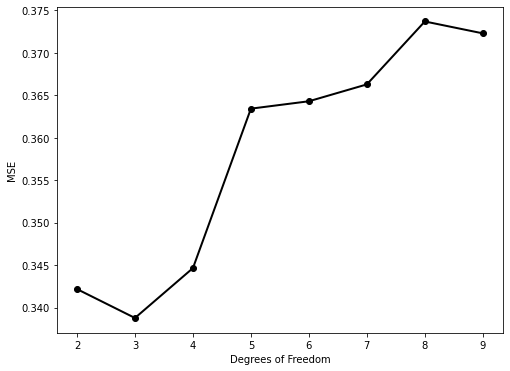

In [25]:
scores = natural_spline_cv(df.horsepower, df.mpg)

Plot the fitting result

In [27]:
predictor = df.horsepower
response = df.mpg
formula = '1 + cr(predictor, df=3, constraints="center")'
X_basis = dmatrix(formula, data={'predictor':predictor}, return_type='matrix')
model = LinearRegression(fit_intercept=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 48.480000000000004)

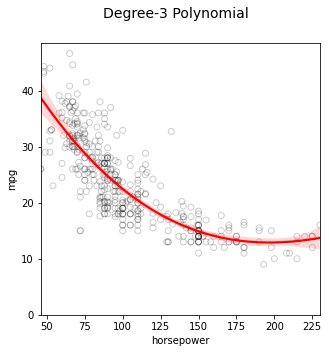

In [30]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
fig.suptitle('Degree-3 Polynomial', fontsize=14)
ax.scatter(predictor, response, facecolor='None', edgecolor='k', alpha=0.2)
import seaborn as sns
sns.regplot(predictor, response, order = 3, truncate=True, scatter=False, ax=ax, color='r')
ax.set_ylim(ymin=0)

Explore: displacement w.r.t. mpg.
We see as follows degree = 3 is best.

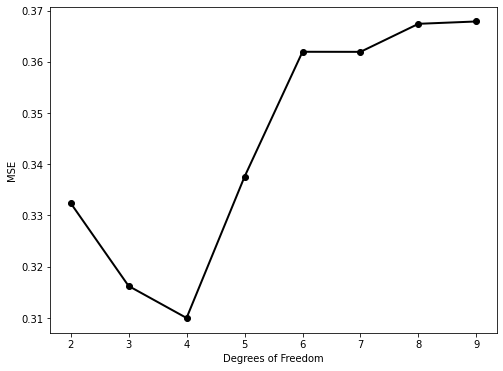

In [26]:
scores = natural_spline_cv(df.displacement, df.mpg)

Plot the fitting result

In [32]:
predictor = df.displacement
response = df.mpg
formula = '1 + cr(predictor, df=4, constraints="center")'
X_basis = dmatrix(formula, data={'predictor':predictor}, return_type='matrix')
model = LinearRegression(fit_intercept=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 48.480000000000004)

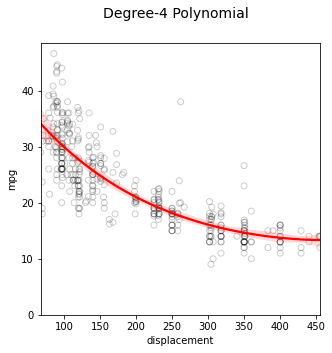

In [33]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
fig.suptitle('Degree-4 Polynomial', fontsize=14)
ax.scatter(predictor, response, facecolor='None', edgecolor='k', alpha=0.2)
import seaborn as sns
sns.regplot(predictor, response, order = 4, truncate=True, scatter=False, ax=ax, color='r')
ax.set_ylim(ymin=0)